# Probem Definition

## Problem
Using student grades, as well as demographic, social, and school-related features, predict the final rating of a student.

The target variable will be the final year grade of a student, which is scaled from 0 to 20. Based on this grade, students will be classified into the following categories:

A: final grade: 16–20

B: final grade: 12–15.9

C: final grade: 8–11.9

D: final grade: 4–7.9

E: final grade: 0–3.9

## Choosing dataset
Choose the dataset named "Student Performance"

https://archive.ics.uci.edu/dataset/320/student+performance

# Read the choosen data

Here I'm choosing the student performance data of math subject

In [2]:
import pandas as pd

In [3]:
filename = "dataset/student-mat.csv"
df_org = pd.read_csv(filename, header=0, sep=";")

# Avoid damaging the original dataset
df = df_org.copy()

# Data Preprocessing

### Data Visualization

In [4]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

Assign types of the data to a variable named "types"

In [6]:
types = df.dtypes
print(types)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


Get a list of the dataset's names and assign it to the variable "names"

In [7]:
names = list(df.columns)
print(names)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


### Checking for missing/ null data

In [8]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Sum all of the columns

In [9]:
df.isnull().sum().sum()

np.int64(0)

### Cheking for invalid data (age cannot be fractional, etc...)

In [10]:
float_columns = df.columns[df.dtypes == 'float']
print("Float Columns:", float_columns)

Float Columns: Index([], dtype='object')


The data does not contain float numbers. Therefore, it does not need to be handle.

### Cleaning for outliers

Creating a copy dataset in order to preventing harm to the main dataset

In [11]:
df_outliers = df.copy()

In [12]:
import matplotlib.pyplot as plt

Showing all of the boxplots at once

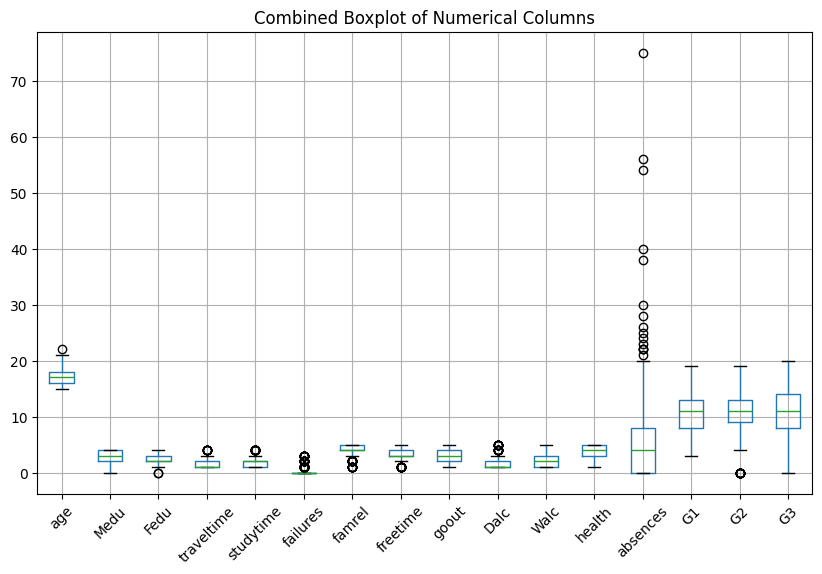

In [13]:
def showingBoxplots(dataset):
    # Filter numerical columns
    numerical_columns = dataset.select_dtypes(include=['int64', 'int32', 'float64']).columns

    # Subset the dataframe with only numerical columns
    df_numerical = dataset[numerical_columns]

    # Create a combined boxplot using pandas
    df_numerical.boxplot(figsize=(10, 6))
    plt.title("Combined Boxplot of Numerical Columns")
    plt.xticks(rotation=45)
    plt.show()
showingBoxplots(df_outliers)

### Z-Score and IQR

In [14]:
import numpy as np

#### Z-Score function

Return indices of the outlier

In [15]:
def Z_score(data, threshold=3):
    data_array = np.array(data)

    mean = np.mean(data_array)
    std = np.std(data_array)
    outliers = []

    # Detect outliers based on Z-score
    for idx, i in enumerate(data_array):
        z = (i - mean) / std
        if abs(z) > threshold:  # Handle both high and low outliers
            outliers.append(idx)  # Collect the index or position of the outlier

    return outliers

#### IQR function 

Return indices of the outlier

In [16]:
def IQR(data):
    data_array = np.array(data)

    Q1 = np.percentile(data_array, 25)  # Calculate the 25th percentile
    Q3 = np.percentile(data_array, 75)  # Calculate the 75th percentile
    IQR_value = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value

    outliers = []

    # Detect outliers based on IQR
    for idx, i in enumerate(data_array):
        if i < lower_bound or i > upper_bound:  # Outlier detection
            outliers.append(idx)  # Collect the index or position of the outlier

    return outliers

#### Checking outliers with loop

In [17]:
def outliers_detect(dataset):
    idx = set()
    column_names = set()
    for i in range(len(types)):
        if types.iloc[i] == 'int64' or types.iloc[i] == 'int32' :
            if(names[i] == "G3"):
                continue
            column_names.add(names[i])
            idx.update(Z_score(dataset[names[i]])) # Return indices tuple
            idx.update(IQR(dataset[names[i]])) # Return indices tuple
    return idx, column_names

#### Functions for treating outliers

In [18]:
def drop_outliers(dataset, indices):
    return dataset.drop(indices, axis=0, inplace=False)  # Drop rows by index

def log(dataset, column_names):
    dataset = dataset.copy()  # Avoid modifying the original dataset
    for column in column_names:  # Iterate over all specified columns
        dataset[column] = np.log(dataset[column]) + 1 # avoiding 0
    return dataset

def sqrt(dataset, column_names):
    dataset = dataset.copy()  # Avoid modifying the original dataset
    for column in column_names:  # Iterate over all specified columns
        dataset[column] = np.sqrt(dataset[column])
    return dataset

def cbrt(dataset, column_names):
    dataset = dataset.copy()  # Avoid modifying the original dataset
    for column in column_names:  # Iterate over all specified columns
        dataset[column] = np.cbrt(dataset[column])
    return dataset

#### Removing outliers

In [19]:
# cbrt the first time
outliers_idx, outlier_columns = outliers_detect(df_outliers)
df_outliers = cbrt(df_outliers, outlier_columns)

### Outliers removed

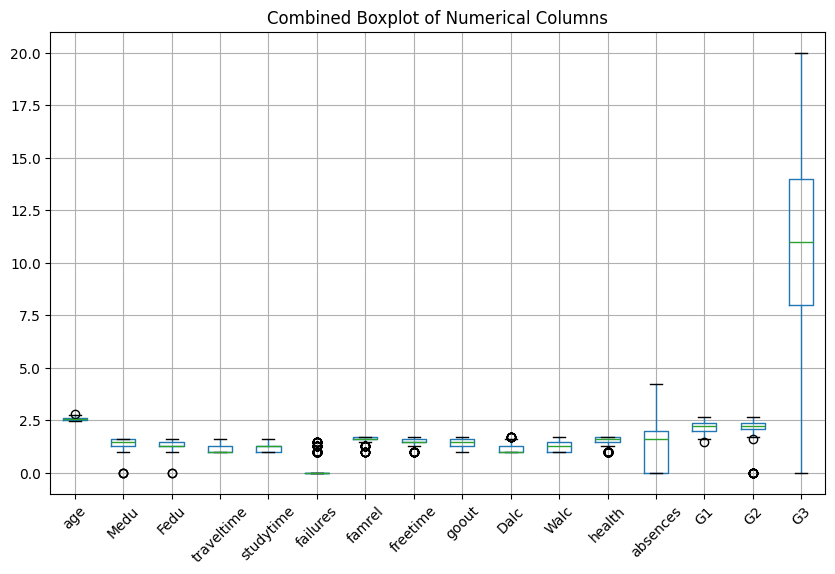

In [20]:
showingBoxplots(df_outliers)

In [21]:
# clip
df_outliers = drop_outliers(df_outliers, outliers_idx)
df_outliers = df_outliers.reset_index(drop=True) 

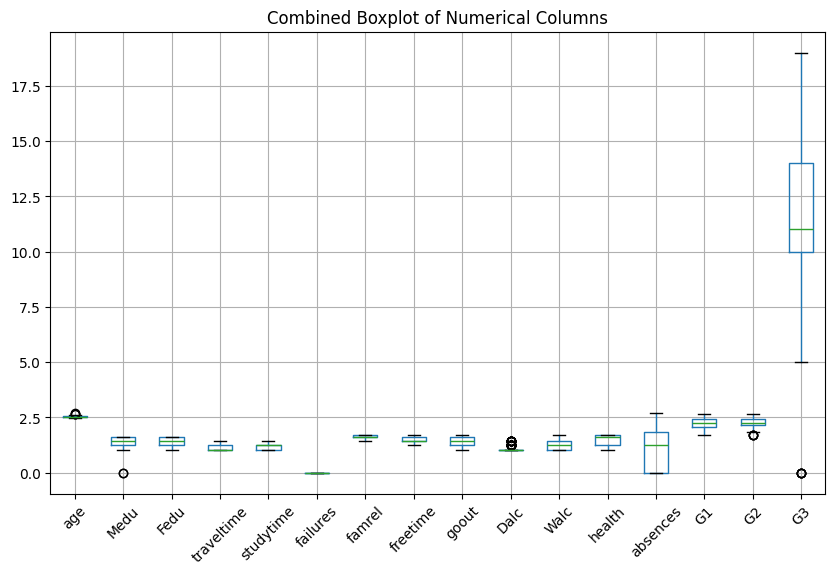

In [22]:
showingBoxplots(df_outliers)

#### Get the values

In [23]:
X_temp = df_outliers.values[:,:-2]
Y_temp = df_outliers.values[:, -1]

In [24]:
print(len(Y_temp))

232


#### **Conclusion**

Outliers removed lead to the dataset missing too many values (from 395 to 232, **41.27%**), which makes the dataset unsuitable for accurate predictions.

Therefore, retain the outliers or handle them using alternative methods.

#### Apply cubic root to the org df

In [25]:
df = cbrt(df, outliers_detect(df)[1])

### Target Categorization

#### Turn continuous values into category values

In [26]:
ranges = [0, 4, 8, 12, 16, 20]  # Define ranges: E (0-3.9), D (4-7.9), C (8-11.9), B (12-15.9), A (16-20)
category = ["E", "D", "C", "B", "A"] 
df['performance_category'] = pd.cut(df['G3'], bins=ranges, labels=category, include_lowest=True)

# Update Y to use the categorized target
Y = df['performance_category']
print(Y)

0      D
1      D
2      C
3      B
4      C
      ..
390    C
391    B
392    D
393    C
394    C
Name: performance_category, Length: 395, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']


#### Result

In [27]:
print(Y.value_counts())  # Shows the number of students in each category

performance_category
C    162
B    107
D     63
E     39
A     24
Name: count, dtype: int64


In [28]:
df.head()

school sex       age address famsize Pstatus      Medu      Fedu     Mjob  \
0     GP   F  2.620741       U     GT3       A  1.587401  1.587401  at_home   
1     GP   F  2.571282       U     GT3       T  1.000000  1.000000  at_home   
2     GP   F  2.466212       U     LE3       T  1.000000  1.000000  at_home   
3     GP   F  2.466212       U     GT3       T  1.587401  1.259921   health   
4     GP   F  2.519842       U     GT3       T  1.442250  1.442250    other   

       Fjob  ...  freetime     goout      Dalc      Walc    health  absences  \
0   teacher  ...  1.442250  1.587401  1.000000  1.000000  1.442250  1.817121   
1     other  ...  1.442250  1.442250  1.000000  1.000000  1.442250  1.587401   
2     other  ...  1.442250  1.259921  1.259921  1.442250  1.442250  2.154435   
3  services  ...  1.259921  1.259921  1.000000  1.000000  1.709976  1.259921   
4     other  ...  1.442250  1.259921  1.000000  1.259921  1.709976  1.587401   

         G1        G2  G3 performance_category  
0  1.709976  1.817121   6                    D  
1  1.709976  1.709976   6                    D  
2  1.912931  2.000000  10                    C  
3  2.466212  2.410142  15                    B  
4  1.817121  2.154435  10                    C  

[5 rows x 34 columns]

### Turn object data type into numerical using label encoder

In [29]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()   
for i in range(len(types)):
    if types.iloc[i] == 'object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])

#### Result after encoding

In [30]:
types = df.dtypes
print(types)

school                     int64
sex                        int64
age                      float64
address                    int64
famsize                    int64
Pstatus                    int64
Medu                     float64
Fedu                     float64
Mjob                       int64
Fjob                       int64
reason                     int64
guardian                   int64
traveltime               float64
studytime                float64
failures                 float64
schoolsup                  int64
famsup                     int64
paid                       int64
activities                 int64
nursery                    int64
higher                     int64
internet                   int64
romantic                   int64
famrel                   float64
freetime                 float64
goout                    float64
Dalc                     float64
Walc                     float64
health                   float64
absences                 float64
G1        

In [31]:
df.head()

school  sex       age  address  famsize  Pstatus      Medu      Fedu  Mjob  \
0       0    0  2.620741        1        0        0  1.587401  1.587401     0   
1       0    0  2.571282        1        0        1  1.000000  1.000000     0   
2       0    0  2.466212        1        1        1  1.000000  1.000000     0   
3       0    0  2.466212        1        0        1  1.587401  1.259921     1   
4       0    0  2.519842        1        0        1  1.442250  1.442250     2   

   Fjob  ...  freetime     goout      Dalc      Walc    health  absences  \
0     4  ...  1.442250  1.587401  1.000000  1.000000  1.442250  1.817121   
1     2  ...  1.442250  1.442250  1.000000  1.000000  1.442250  1.587401   
2     2  ...  1.442250  1.259921  1.259921  1.442250  1.442250  2.154435   
3     3  ...  1.259921  1.259921  1.000000  1.000000  1.709976  1.259921   
4     2  ...  1.442250  1.259921  1.000000  1.259921  1.709976  1.587401   

         G1        G2  G3  performance_category  
0  1.709976  1.817121   6                     D  
1  1.709976  1.709976   6                     D  
2  1.912931  2.000000  10                     C  
3  2.466212  2.410142  15                     B  
4  1.817121  2.154435  10                     C  

[5 rows x 34 columns]

### data normalization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaler.fit(df.iloc[:, :-2])
df.iloc[:, :-2] = scaler.transform(df.iloc[:, :-2])


/var/folders/bj/1dwrxrz93sj3z1_nm0vwf3vw0000gn/T/ipykernel_89032/3690247121.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498  -0.3630498
 -0.3630

#### Result

In [34]:
df.head()

school       sex       age   address   famsize   Pstatus      Medu  \
0 -0.36305 -0.948176  1.031224  0.535392 -0.636941 -2.938392  0.946244   
1 -0.36305 -0.948176  0.264249  0.535392 -0.636941  0.340322 -1.562354   
2 -0.36305 -0.948176 -1.365070  0.535392  1.570004  0.340322 -1.562354   
3 -0.36305 -0.948176 -1.365070  0.535392 -0.636941  0.340322  0.946244   
4 -0.36305 -0.948176 -0.533426  0.535392 -0.636941  0.340322  0.326349   

       Fedu      Mjob      Fjob  ...  freetime     goout      Dalc      Walc  \
0  1.146340 -1.769793  1.993149  ... -0.111208  0.815750 -0.591256 -1.103354   
1 -1.423070 -1.769793 -0.325831  ... -0.111208  0.031186 -0.591256 -1.103354   
2 -1.423070 -1.769793 -0.325831  ... -0.111208 -0.954324  0.831407  0.692781   
3 -0.286123 -0.954077  0.833659  ... -1.203910 -0.954324 -0.591256 -1.103354   
4  0.511418 -0.138362 -0.325831  ... -0.111208 -0.954324 -0.591256 -0.047721   

     health  absences        G1        G2  G3  performance_category  
0 -0.213212  0.532028 -2.105396 -0.702461   6                     D  
1 -0.213212  0.290858 -2.105396 -0.939820   6                     D  
2 -0.213212  0.886157 -1.222808 -0.297327  10                     C  
3  0.932641 -0.052947  1.183233  0.611266  15                     B  
4  0.932641  0.290858 -1.639458  0.044794  10                     C  

[5 rows x 34 columns]

In [35]:
df = cbrt(df, outliers_detect(df)[1])
df = cbrt(df, outliers_detect(df)[1])

# Data Splitting

### Get the values of the data

In [36]:
X = df.values[:,:-2] # all of the columns except for G3 and performance_category
Y = df['performance_category']

### Train sets and Test sets

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=42)

#### **Train set**

In [38]:
print((y_train))
print("Length: ",len(y_train))

16     B
66     C
211    B
7      D
19     C
      ..
71     C
106    D
270    C
348    B
102    B
Name: performance_category, Length: 296, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']
Length:  296


#### **Test set**

In [39]:
print((y_test))
print("Length: ",len(y_test))

78     C
371    C
248    D
55     C
390    C
      ..
367    E
210    D
75     C
104    A
374    A
Name: performance_category, Length: 99, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']
Length:  99


# Models Selection

Apply weight to each grade, as we need to focus on specific grades like E and D.

In [40]:
class_weights = {
    "A": 1,    # Lowest weight
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5     # Highest weight
}

#### **k-Nearest Neighbors**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)

kNN.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

#### Prediction

In [42]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_kNN = kNN.predict(X_test) # prediction

print("kNN")
print(confusion_matrix(y_test,y_pred_kNN))
print(classification_report(y_test,y_pred_kNN))

kNN
[[ 3  3  2  0  0]
 [ 5 12 12  0  0]
 [ 0  6 22  3  2]
 [ 0  4 13  3  0]
 [ 0  0  4  2  3]]
              precision    recall  f1-score   support

           A       0.38      0.38      0.38         8
           B       0.48      0.41      0.44        29
           C       0.42      0.67      0.51        33
           D       0.38      0.15      0.21        20
           E       0.60      0.33      0.43         9

    accuracy                           0.43        99
   macro avg       0.45      0.39      0.39        99
weighted avg       0.44      0.43      0.41        99



#### **Ridge**

In [43]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(class_weight=class_weights)
ridge.fit(X_train,y_train)

RidgeClassifier(class_weight={'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})

#### Prediction

In [44]:
y_pred_ridge = ridge.predict(X_test) # prediction

print("Ridge")
print(confusion_matrix(y_test,y_pred_ridge))
print(classification_report(y_test,y_pred_ridge))

Ridge
[[ 0  6  2  0  0]
 [ 0 10 19  0  0]
 [ 0  3 24  5  1]
 [ 0  0  9 10  1]
 [ 0  0  1  3  5]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.53      0.34      0.42        29
           C       0.44      0.73      0.55        33
           D       0.56      0.50      0.53        20
           E       0.71      0.56      0.62         9

    accuracy                           0.49        99
   macro avg       0.45      0.43      0.42        99
weighted avg       0.48      0.49      0.47        99



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### **Support Vector Machines (SVM)**

In [45]:
from sklearn.svm import SVC

svm = SVC(class_weight=class_weights)
svm.fit(X_train,y_train)

SVC(class_weight={'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})

#### Prediction

In [46]:
y_pred_svm = svm.predict(X_test) # prediction

print("Support Vector Machines")
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

Support Vector Machines
[[ 0  8  0  0  0]
 [ 0 19 10  0  0]
 [ 0  1 30  1  1]
 [ 0  0  9 10  1]
 [ 0  0  4  2  3]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.68      0.66      0.67        29
           C       0.57      0.91      0.70        33
           D       0.77      0.50      0.61        20
           E       0.60      0.33      0.43         9

    accuracy                           0.63        99
   macro avg       0.52      0.48      0.48        99
weighted avg       0.60      0.63      0.59        99



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### **Stochastic Gradient Descent (SGD)**

In [47]:
from sklearn.linear_model import SGDClassifier  # For classification

sgd = SGDClassifier(max_iter=1000, tol=1e-3, class_weight=class_weights)
sgd.fit(X_train,y_train)

SGDClassifier(class_weight={'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5})

#### Prediction

In [48]:
y_pred_sgd = sgd.predict(X_test) # prediction

print("Stochastic Gradient Descent")
print(confusion_matrix(y_test,y_pred_sgd))
print(classification_report(y_test,y_pred_sgd))

Stochastic Gradient Descent
[[ 3  4  1  0  0]
 [ 0 17 12  0  0]
 [ 0  5 17 10  1]
 [ 0  0  4 14  2]
 [ 0  0  1  1  7]]
              precision    recall  f1-score   support

           A       1.00      0.38      0.55         8
           B       0.65      0.59      0.62        29
           C       0.49      0.52      0.50        33
           D       0.56      0.70      0.62        20
           E       0.70      0.78      0.74         9

    accuracy                           0.59        99
   macro avg       0.68      0.59      0.60        99
weighted avg       0.61      0.59      0.58        99



#### **Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5},
                       random_state=42)

#### Prediction

In [50]:
y_pred_rf = rf.predict(X_test) # prediction

print("Random Forest")
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest
[[ 2  6  0  0  0]
 [ 0 28  1  0  0]
 [ 0  2 30  1  0]
 [ 0  0  7 11  2]
 [ 0  0  3  1  5]]
              precision    recall  f1-score   support

           A       1.00      0.25      0.40         8
           B       0.78      0.97      0.86        29
           C       0.73      0.91      0.81        33
           D       0.85      0.55      0.67        20
           E       0.71      0.56      0.62         9

    accuracy                           0.77        99
   macro avg       0.81      0.65      0.67        99
weighted avg       0.79      0.77      0.75        99



#### **Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5},
                       random_state=42)

#### Prediction

In [52]:
y_pred_dt = dt.predict(X_test) # prediction

print("Decision Tree")
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Decision Tree
[[ 7  1  0  0  0]
 [ 1 27  1  0  0]
 [ 0  3 24  5  1]
 [ 0  0  2 15  3]
 [ 0  0  0  2  7]]
              precision    recall  f1-score   support

           A       0.88      0.88      0.88         8
           B       0.87      0.93      0.90        29
           C       0.89      0.73      0.80        33
           D       0.68      0.75      0.71        20
           E       0.64      0.78      0.70         9

    accuracy                           0.81        99
   macro avg       0.79      0.81      0.80        99
weighted avg       0.82      0.81      0.81        99



# Comparasion

Use the process of cross-validation to find the mean of recall score. With k = 10 (10 equal sub-sets)

In [53]:
from sklearn.model_selection import cross_val_score
k = 10

In [54]:
def Mean_scores_output():
    recall_scores_kNN = cross_val_score(kNN, X, Y, cv=k, scoring='recall_weighted')  # k-fold cross-validation

    recall_scores_ridge = cross_val_score(ridge, X, Y, cv=k, scoring='recall_weighted')  

    recall_scores_svm = cross_val_score(svm, X, Y, cv=k, scoring='recall_weighted')  

    recall_scores_sgd = cross_val_score(sgd, X, Y, cv=k, scoring='recall_weighted')  

    recall_scores_rf = cross_val_score(rf, X, Y, cv=k, scoring='recall_weighted') 

    recall_scores_dt = cross_val_score(dt, X, Y, cv=k, scoring='recall_weighted')
    
    print("\nrecall scores across folds using kNN:", recall_scores_kNN)  
    print("Mean recall:", recall_scores_kNN.mean())

    print("\nrecall scores across folds using Ridge:", recall_scores_ridge)  
    print("Mean recall:", recall_scores_ridge.mean())

    print("\nrecall scores across folds using SVM:", recall_scores_svm) 
    print("Mean recall:", recall_scores_svm.mean())

    print("\nrecall scores across folds using SGD:", recall_scores_sgd) 
    print("Mean recall:", recall_scores_sgd.mean())

    print("\nrecall scores across folds using RF:", recall_scores_rf)  
    print("Mean recall:", recall_scores_rf.mean())

    print("\nrecall scores across folds using DT:", recall_scores_dt)  
    print("Mean recall:", recall_scores_dt.mean())

**output**

In [55]:
Mean_scores_output()


recall scores across folds using kNN: [0.475      0.525      0.425      0.425      0.475      0.48717949
 0.48717949 0.43589744 0.46153846 0.53846154]
Mean recall: 0.473525641025641

recall scores across folds using Ridge: [0.575      0.575      0.375      0.5        0.6        0.56410256
 0.53846154 0.48717949 0.64102564 0.53846154]
Mean recall: 0.5394230769230769

recall scores across folds using SVM: [0.775      0.7        0.55       0.725      0.675      0.64102564
 0.66666667 0.56410256 0.74358974 0.61538462]
Mean recall: 0.6655769230769231

recall scores across folds using SGD: [0.625      0.7        0.5        0.55       0.575      0.41025641
 0.53846154 0.56410256 0.51282051 0.43589744]
Mean recall: 0.5411538461538462

recall scores across folds using RF: [0.825      0.875      0.8        0.85       0.725      0.82051282
 0.74358974 0.82051282 0.76923077 0.82051282]
Mean recall: 0.8049358974358973

recall scores across folds using DT: [0.7        0.75       0.7        0.775   

# Overfitting

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

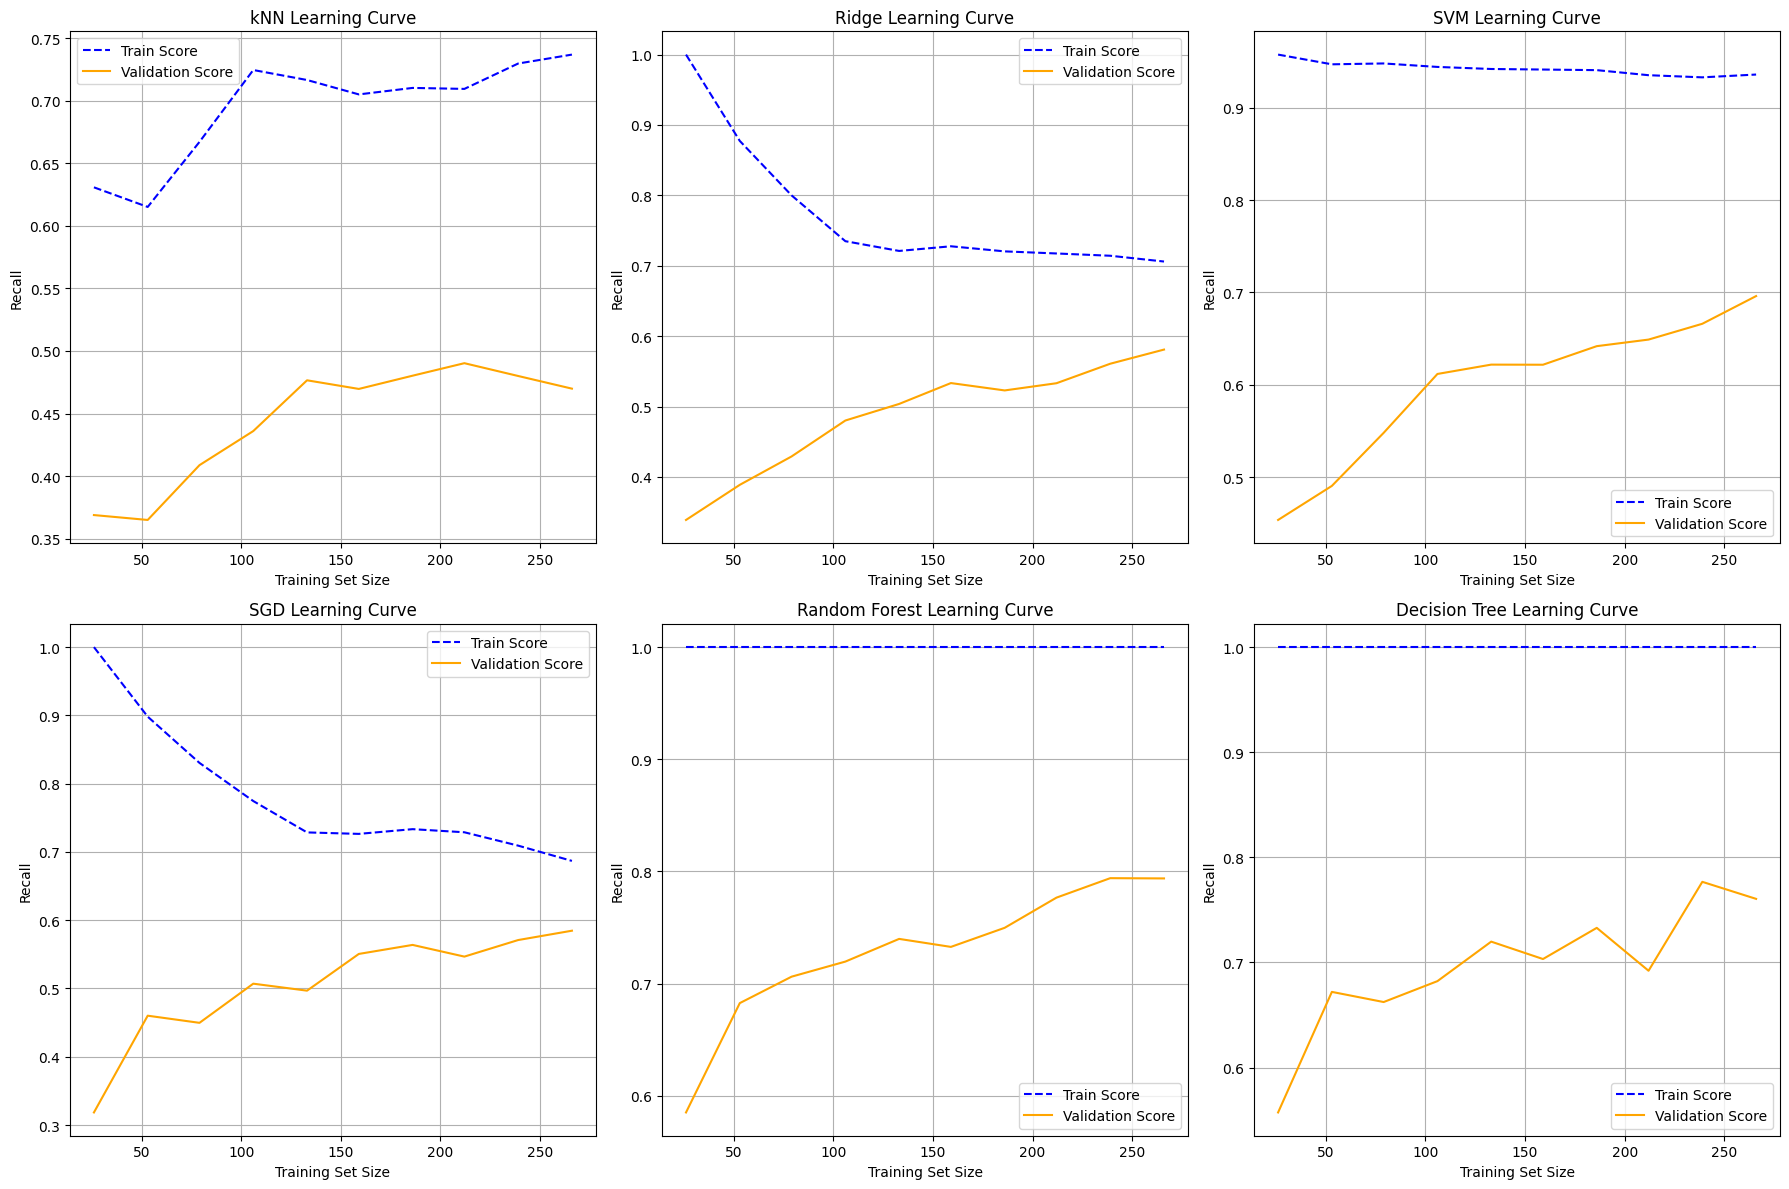

In [57]:
def plot_learning_curves(models):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figsize as needed
    axes = axes.flatten()  # Flatten axes to iterate easily

    # Generate learning curves for each model
    for i, (model_name, model) in enumerate(models.items()):
        train_sizes, train_scores, validation_scores = learning_curve(
            model, X_train, y_train, cv=k, scoring="recall_weighted", train_sizes=np.linspace(0.1, 1.0, 10)
        )

        # Calculate mean scores for training and validation
        train_scores_mean = train_scores.mean(axis=1)
        validation_scores_mean = validation_scores.mean(axis=1)

        # Plot the learning curve in the corresponding subplot
        ax = axes[i]
        ax.plot(train_sizes, train_scores_mean, label="Train Score", linestyle="dashed", color="blue")
        ax.plot(train_sizes, validation_scores_mean, label="Validation Score", color="orange")
        ax.set_title(f"{model_name} Learning Curve")
        ax.set_xlabel("Training Set Size")
        ax.set_ylabel("Recall")
        ax.legend()
        ax.grid()

    # Adjust layout and spacing
    plt.tight_layout()
    plt.show()
models = {
    "kNN": kNN,
    "Ridge": ridge,
    "SVM": svm,
    "SGD": sgd,
    "Random Forest": rf,
    "Decision Tree": dt,
}
plot_learning_curves(models)

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
def GridSearch(model, hyperpara_grid):
    grid_search = GridSearchCV(model, hyperpara_grid, cv=10, scoring='recall_weighted')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

#### **k-Nearest Neighbors**

In [60]:
print("k-Nearest Neighbors")
param_grid = {
    'n_neighbors': [13, 15, 17, 19, 21, 23, 25], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']
    }
print(GridSearch(kNN, param_grid))

k-Nearest Neighbors
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


#### **Decision Tree**

In [61]:
print("Decision Tree")
param_grid = {
    'max_depth': [2, 3, 4, 5, 6], 
    'min_samples_split': [2, 5, 10, 12]
    }
print(GridSearch(dt, param_grid))

Decision Tree
{'max_depth': 4, 'min_samples_split': 10}


#### **Random Forest**

In [62]:
print("Random Forest")
param_grid = {
    'n_estimators': [50, 100, 200, 250], 
    'max_depth': [3, 5, 7, 9 , 11],
    'min_samples_leaf': [1, 2]
    }
print(GridSearch(rf, param_grid))

Random Forest
{'max_depth': 11, 'min_samples_leaf': 1, 'n_estimators': 200}


#### **Ridge**

In [63]:
print("Ridge")
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  # Lambda values
}
print(GridSearch(ridge, param_grid))

Ridge
{'alpha': 0.0001}


#### **SVM**

In [64]:
print("SVM")
param_grid = {
    'C': [0.1, 1, 10, 100],  # C is regularization strength (lower means more effective) using in SVM, the inverse of lambda.
    'kernel': ['sigmoid','rbf', 'poly']
}
print(GridSearch(svm, param_grid))

SVM
{'C': 1, 'kernel': 'rbf'}


#### **SGD**

In [65]:
print("SGD")
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Lambda values
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'max_iter': [1000, 2000],  # Number of iterations
    'early_stopping': [True, False],
}
print(GridSearch(sgd, param_grid))

SGD
{'alpha': 0.01, 'early_stopping': False, 'max_iter': 2000, 'penalty': 'l1'}


### Output using new hyperparameters

#### **k-Nearest Neighbors**

In [66]:
kNN_new = KNeighborsClassifier(n_neighbors= 13, metric='euclidean',weights='distance')
kNN_new.fit(X_train,y_train)

y_pred_kNN = kNN_new.predict(X_test) # prediction

print("k-Nearest Neighbors")
print(confusion_matrix(y_test,y_pred_kNN))
print(classification_report(y_test,y_pred_kNN))

k-Nearest Neighbors
[[ 0  6  2  0  0]
 [ 0 12 17  0  0]
 [ 0  1 30  2  0]
 [ 0  0 18  2  0]
 [ 0  0  6  1  2]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.63      0.41      0.50        29
           C       0.41      0.91      0.57        33
           D       0.40      0.10      0.16        20
           E       1.00      0.22      0.36         9

    accuracy                           0.46        99
   macro avg       0.49      0.33      0.32        99
weighted avg       0.49      0.46      0.40        99



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### **Ridge**

In [67]:
ridge_new = RidgeClassifier(alpha=0.0001, class_weight=class_weights)
ridge_new.fit(X_train,y_train)

y_pred_ridge = ridge_new.predict(X_test) # prediction

print("Ridge")
print(confusion_matrix(y_test,y_pred_ridge))
print(classification_report(y_test,y_pred_ridge))

Ridge
[[ 0  6  2  0  0]
 [ 0 10 19  0  0]
 [ 0  3 24  5  1]
 [ 0  0  9 10  1]
 [ 0  0  1  3  5]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.53      0.34      0.42        29
           C       0.44      0.73      0.55        33
           D       0.56      0.50      0.53        20
           E       0.71      0.56      0.62         9

    accuracy                           0.49        99
   macro avg       0.45      0.43      0.42        99
weighted avg       0.48      0.49      0.47        99



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### **Support Vector Machines**

In [68]:
svm_new = SVC(C= 1, kernel='rbf', class_weight=class_weights)
svm_new.fit(X_train,y_train)

y_pred_svm = svm_new.predict(X_test) # prediction

print("Support Vector Machines")
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

Support Vector Machines
[[ 0  8  0  0  0]
 [ 0 19 10  0  0]
 [ 0  1 30  1  1]
 [ 0  0  9 10  1]
 [ 0  0  4  2  3]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         8
           B       0.68      0.66      0.67        29
           C       0.57      0.91      0.70        33
           D       0.77      0.50      0.61        20
           E       0.60      0.33      0.43         9

    accuracy                           0.63        99
   macro avg       0.52      0.48      0.48        99
weighted avg       0.60      0.63      0.59        99



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

#### **Stochastic Gradient Descent**

In [69]:
sgd_new = sgd = SGDClassifier(alpha=0.01, max_iter=2000, early_stopping=False, penalty='l1', class_weight=class_weights)
sgd_new.fit(X_train,y_train)

y_pred_sgd = sgd_new.predict(X_test) # prediction

print("Stochastic Gradient Descent")
print(confusion_matrix(y_test,y_pred_sgd))
print(classification_report(y_test,y_pred_sgd))

Stochastic Gradient Descent
[[ 1  7  0  0  0]
 [ 0 18 10  1  0]
 [ 0  1 27  5  0]
 [ 0  0  4 14  2]
 [ 0  0  2  1  6]]
              precision    recall  f1-score   support

           A       1.00      0.12      0.22         8
           B       0.69      0.62      0.65        29
           C       0.63      0.82      0.71        33
           D       0.67      0.70      0.68        20
           E       0.75      0.67      0.71         9

    accuracy                           0.67        99
   macro avg       0.75      0.59      0.60        99
weighted avg       0.70      0.67      0.65        99



#### **Random Forest**

In [70]:
rf_new = RandomForestClassifier(max_depth=11, min_samples_leaf=1, n_estimators=200, class_weight=class_weights)
rf_new.fit(X_train,y_train)

y_pred_rf = rf_new.predict(X_test) # prediction

print("Random Forest")
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest
[[ 4  4  0  0  0]
 [ 0 28  1  0  0]
 [ 0  2 28  3  0]
 [ 0  0  9  9  2]
 [ 0  0  2  0  7]]
              precision    recall  f1-score   support

           A       1.00      0.50      0.67         8
           B       0.82      0.97      0.89        29
           C       0.70      0.85      0.77        33
           D       0.75      0.45      0.56        20
           E       0.78      0.78      0.78         9

    accuracy                           0.77        99
   macro avg       0.81      0.71      0.73        99
weighted avg       0.78      0.77      0.75        99



#### **Decision Tree**

In [71]:
dt_new = DecisionTreeClassifier(max_depth=4, min_samples_split=10, class_weight=class_weights)
dt_new.fit(X_train,y_train)

y_pred_dt = dt_new.predict(X_test) # prediction

print("Decision Tree")
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

Decision Tree
[[ 7  1  0  0  0]
 [ 0 27  2  0  0]
 [ 0  2 28  3  0]
 [ 0  0  2 16  2]
 [ 0  0  1  2  6]]
              precision    recall  f1-score   support

           A       1.00      0.88      0.93         8
           B       0.90      0.93      0.92        29
           C       0.85      0.85      0.85        33
           D       0.76      0.80      0.78        20
           E       0.75      0.67      0.71         9

    accuracy                           0.85        99
   macro avg       0.85      0.82      0.84        99
weighted avg       0.85      0.85      0.85        99



**Mean Scores**

In [72]:
Mean_scores_output()


recall scores across folds using kNN: [0.475      0.525      0.425      0.425      0.475      0.48717949
 0.48717949 0.43589744 0.46153846 0.53846154]
Mean recall: 0.473525641025641

recall scores across folds using Ridge: [0.575      0.575      0.375      0.5        0.6        0.56410256
 0.53846154 0.48717949 0.64102564 0.53846154]
Mean recall: 0.5394230769230769

recall scores across folds using SVM: [0.775      0.7        0.55       0.725      0.675      0.64102564
 0.66666667 0.56410256 0.74358974 0.61538462]
Mean recall: 0.6655769230769231

recall scores across folds using SGD: [0.725      0.75       0.625      0.625      0.65       0.69230769
 0.66666667 0.69230769 0.64102564 0.51282051]
Mean recall: 0.6580128205128205

recall scores across folds using RF: [0.825      0.875      0.8        0.85       0.725      0.82051282
 0.74358974 0.82051282 0.76923077 0.82051282]
Mean recall: 0.8049358974358973

recall scores across folds using DT: [0.7        0.75       0.7        0.775   

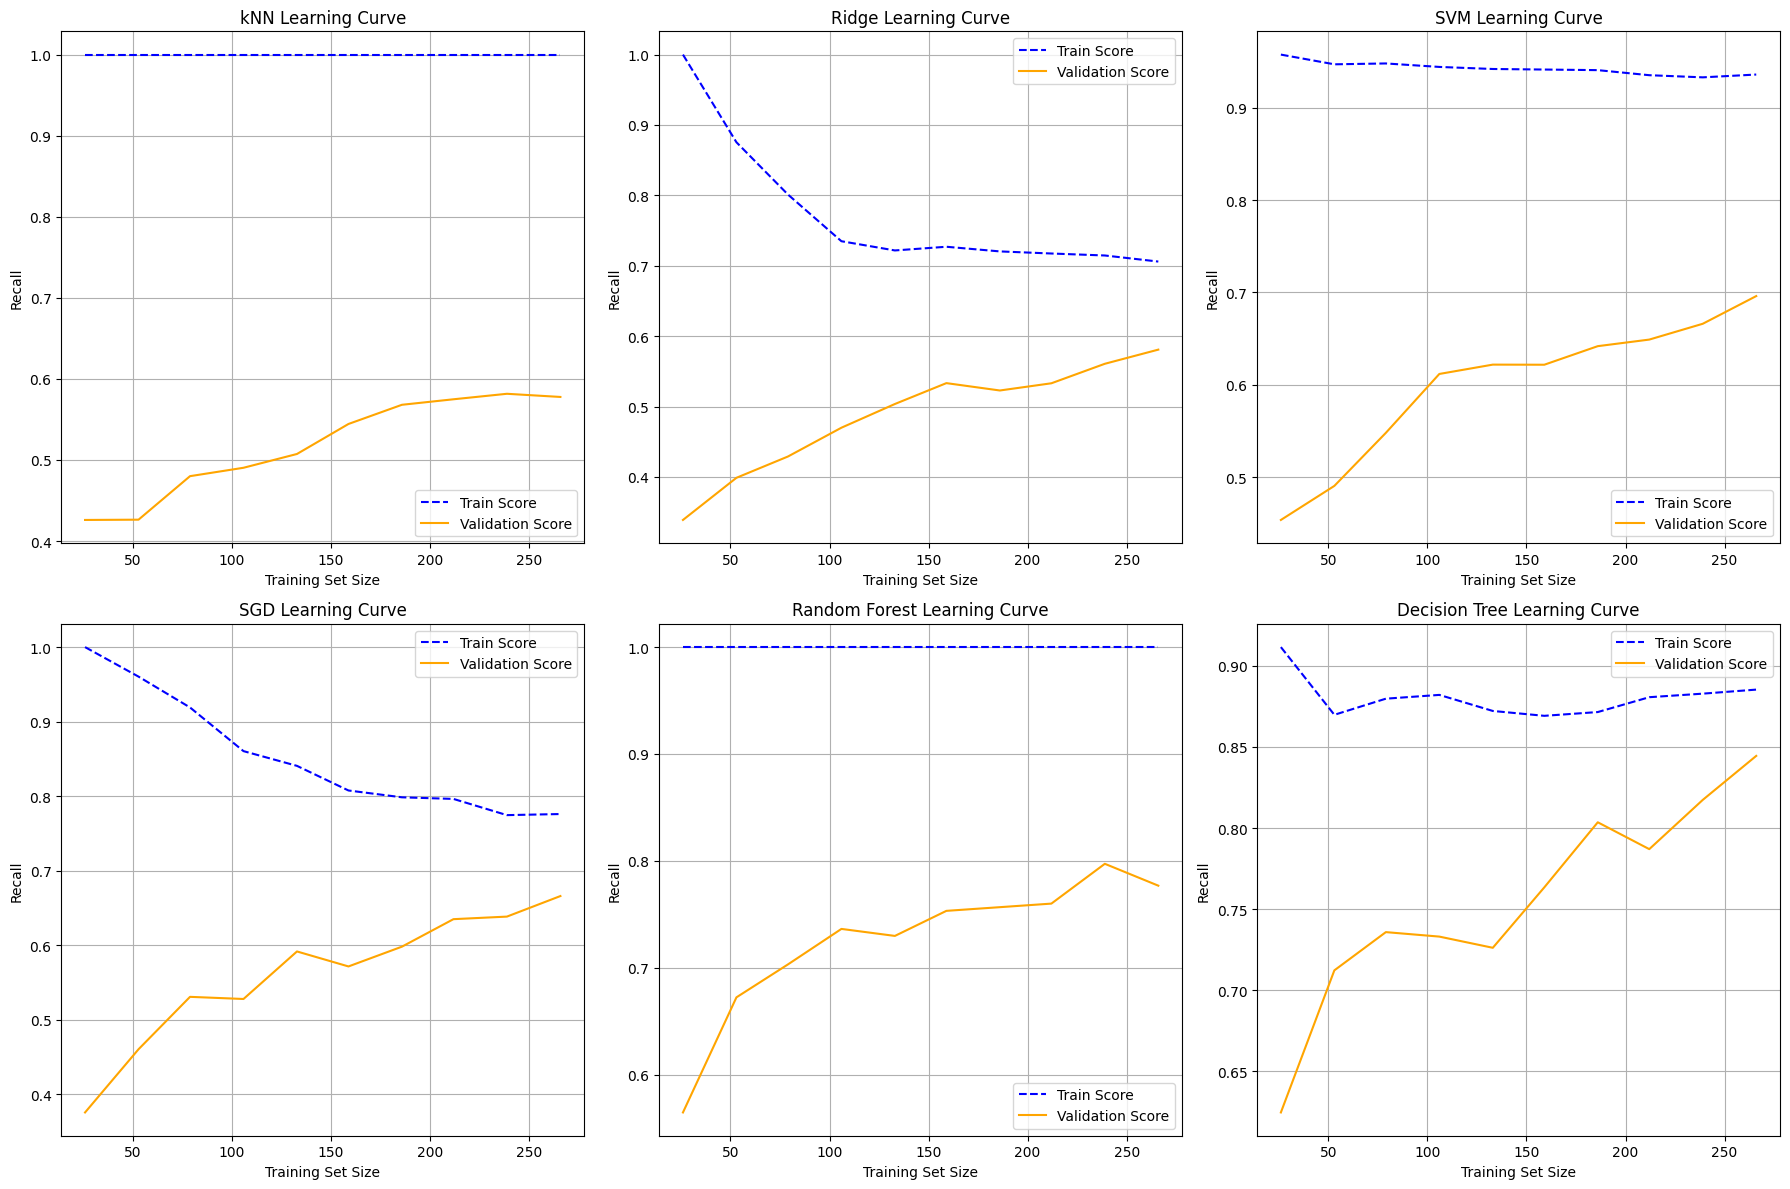

In [73]:
models_new = {
    "kNN": kNN_new,
    "Ridge": ridge_new,
    "SVM": svm_new,
    "SGD": sgd_new,
    "Random Forest": rf_new,
    "Decision Tree": dt_new,
}
plot_learning_curves(models_new)

### **Comparasion**

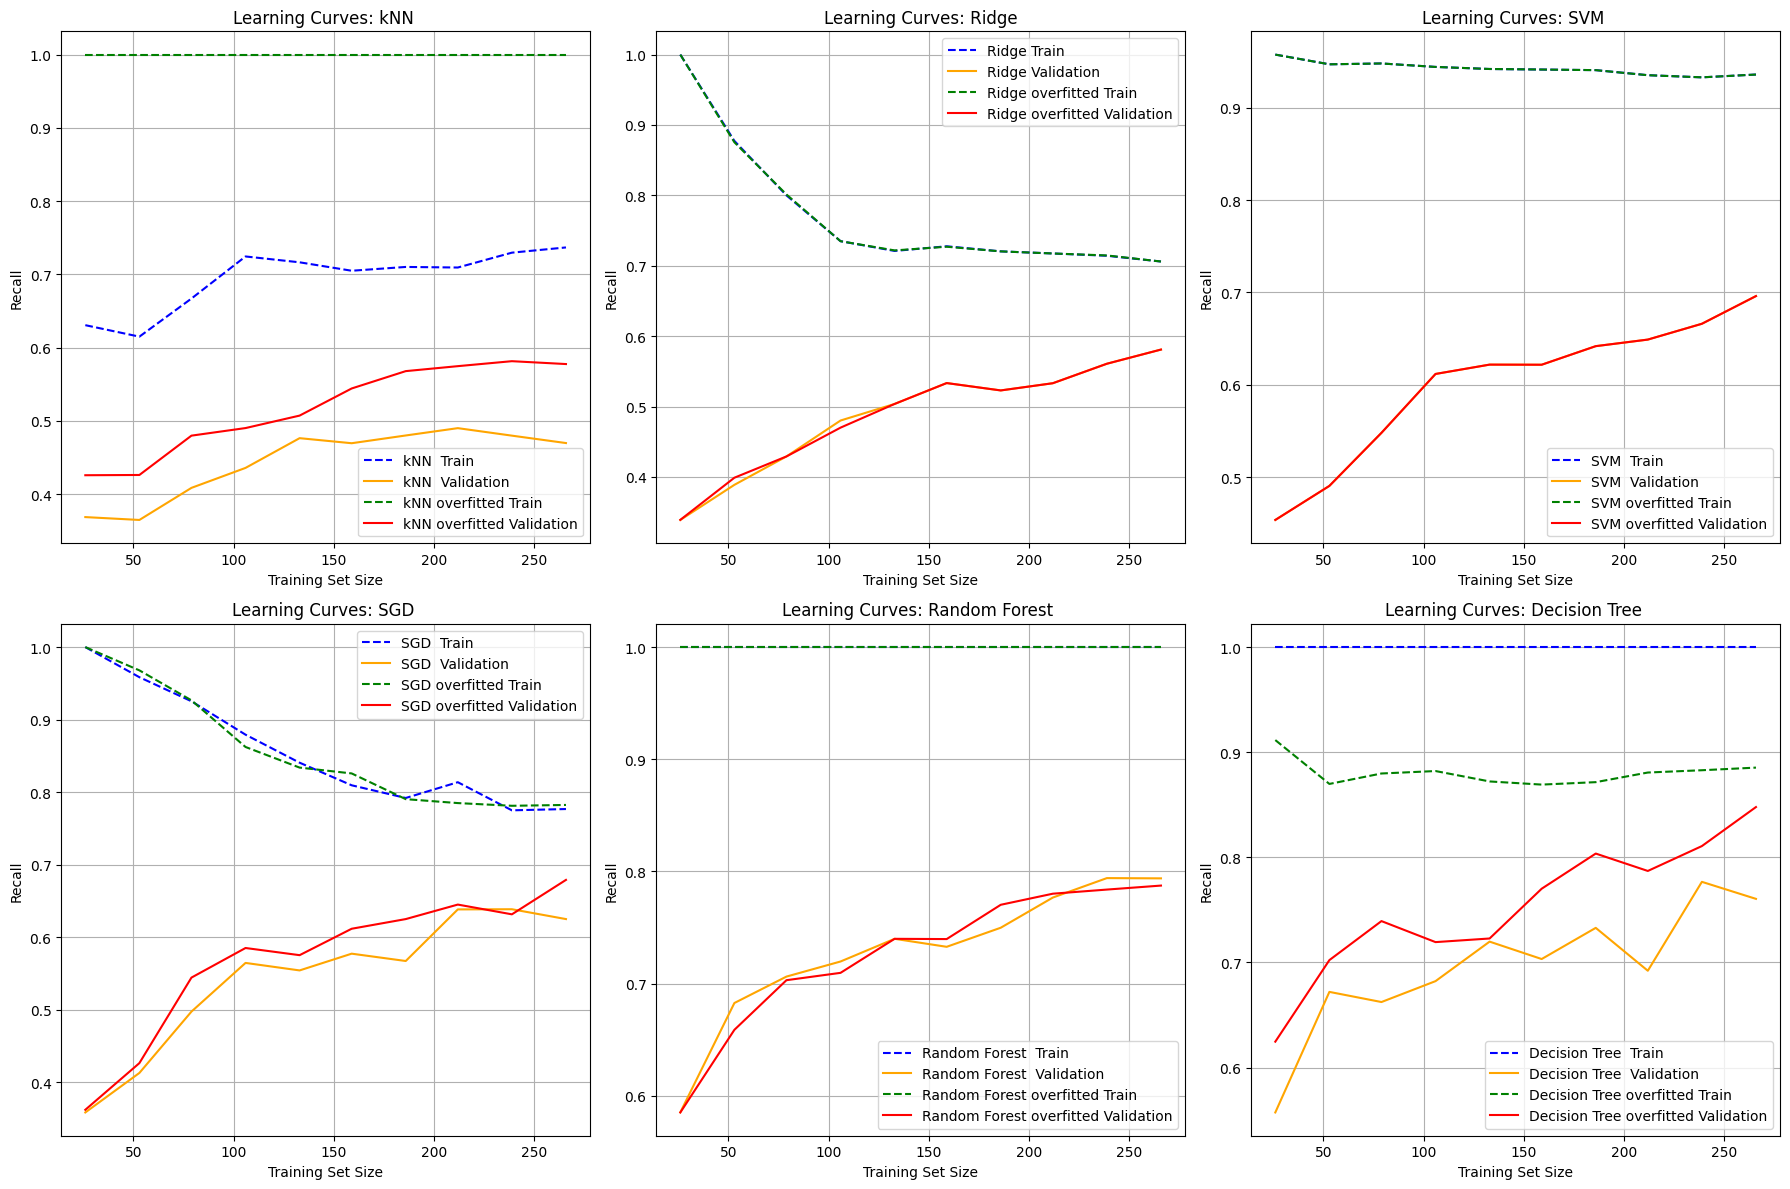

In [74]:
models = {
    "kNN ": kNN,
    "kNN overfitted": kNN_new,
    "Ridge": ridge,
    "Ridge overfitted": ridge_new,
    "SVM ": svm,
    "SVM overfitted": svm_new,
    "SGD ": sgd,
    "SGD overfitted": sgd_new,
    "Random Forest ": rf,
    "Random Forest overfitted": rf_new,
    "Decision Tree ": dt,
    "Decision Tree overfitted": dt_new,
}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes to iterate easily

for i, ((model_name_1, model_1), (model_name_2, model_2)) in enumerate(zip(list(models.items())[::2], list(models.items())[1::2])):
    train_sizes_1, train_scores_1, validation_scores_1 = learning_curve(
        model_1, X_train, y_train, cv=k, scoring="recall_weighted", train_sizes=np.linspace(0.1, 1.0, 10)
    )
    train_sizes_2, train_scores_2, validation_scores_2 = learning_curve(
        model_2, X_train, y_train, cv=k, scoring="recall_weighted", train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean scores for training and validation
    train_scores_mean_1 = train_scores_1.mean(axis=1)
    validation_scores_mean_1 = validation_scores_1.mean(axis=1)
    train_scores_mean_2 = train_scores_2.mean(axis=1)
    validation_scores_mean_2 = validation_scores_2.mean(axis=1)

    # Plot the learning curves for both models in the corresponding subplot
    ax = axes[i]
    ax.plot(train_sizes_1, train_scores_mean_1, label=f"{model_name_1} Train", linestyle="dashed", color="blue")
    ax.plot(train_sizes_1, validation_scores_mean_1, label=f"{model_name_1} Validation", color="orange")
    ax.plot(train_sizes_2, train_scores_mean_2, label=f"{model_name_2} Train", linestyle="dashed", color="green")
    ax.plot(train_sizes_2, validation_scores_mean_2, label=f"{model_name_2} Validation", color="red")
    ax.set_title(f"Learning Curves: {model_name_1}")
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("Recall")
    ax.legend()
    ax.grid()

# Adjust layout and spacing
plt.tight_layout()
plt.show()